# Decision Tree(결정트리, 의사결정 나무)
- https://pinkwink.kr/1141
- 지도 분류 학습
- 랜덤 포레스트: 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 부류(분류) 또는 평균 예측치(회귀 분석)를 출력함으로써 동작
- 주로 랜덤 포레스트를 사용
- **엔트로피(Entropy)**
    - 불순도를 수치적으로 나타낸 척도, 엔트로피가 높으면 불순도가 높다는 뜻임
    - 엔트로피가 1이면 불순도 최대 (한 범주안에 데이터가 반반씩 있음을 뜻함)
    - 엔트로피가 0이면 불순도 최소 (한 범주안에 같은종류의 데이터만 있음)<br>
$Entropy = -\sum_{i}(P_i)log_2(Pi)$<br>
($P_i$ = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율)
- **정보획득(Information gain)**
    -  **분기이전의 엔트로피**에서 **분기이후의 엔트로피**를 뺀 수치가 정보획득량임
    - 결정트리 알고리즘은 정보획득을 최대화하는 방향으로 학습이 진행됨
- **가지치기(Pruning)**
    - 오버피팅을 막기위한 전략임. 트리에 가지가 너무 많다면 오버피팅으로 볼수 있음.
    - 최대 깊이나 터미널 노드의 최대 개수, 혹은 한 노드가 분할하기 위한 최소 데이터수를 제한
    - min_sample_split,  max_depth<br>
<br>
- **와인분류 실습**
    - wine의 데이터셋이해
        - 레드와인과 화이트 와인의 alcohol, sugar, PH의 관계 조사
        - 이 자료의 class가 1이면 화이트 화인/0이면 레드와인임
        - alcohol: 도수가 높을수록 화이트 와인
        - sugar: 당도가 높을수록 화이트 와인
        - PH: 산성이 클수록 레드 와인

In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [5]:
f = '/content/mnt/MyDrive/데이터/판다스데이터분석_실습/집계EDA실습_및_분류분석/data'

## EDA

- 자료 호출 및 합치기

In [6]:
wine1 = pd.read_csv(f'{f}/wine1.csv', sep='\t')
wine2 = pd.read_csv(f'{f}/wine2.csv', sep='\t')

In [7]:
wine1.head()

,index,alcohol,class
0,7001,9.90,999.0
1,1,9.40,0.0
2,2,9.80,0.0
3,3,9.99,999.0
4,6498,9.80,0.0


In [8]:
wine2.head()

,index,sugar_PH
0,7000,2.3/3.5
1,1,1.9/3.51
2,2,2.6/3.2
3,6498,2.3/3.26
4,4,1.9/3.16


In [9]:
wine1.set_index('index', inplace=True)

In [10]:
wine2.set_index('index', inplace=True)

In [11]:
wine = wine1.join(wine2, how='inner')

In [12]:
wine.reset_index(inplace=True)

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 203.2+ KB


In [14]:
wine.describe()

,index,alcohol,class
count,6497.000000,6497.000000,6493.000000
mean,3250.998461,10.491801,0.754351
std,1875.669345,1.192712,0.430505
min,1.000000,8.000000,0.000000
25%,1627.000000,9.500000,1.000000
50%,3251.000000,10.300000,1.000000
75%,4875.000000,11.300000,1.000000
max,6499.000000,14.900000,1.000000


In [15]:
wine.head()

,index,alcohol,class,sugar_PH
0,1,9.4,0.0,1.9/3.51
1,2,9.8,0.0,2.6/3.2
2,6498,9.8,0.0,2.3/3.26
3,4,9.8,0.0,1.9/3.16
4,5,9.4,0.0,1.9/3.51


- 자료 속성변환 및 NA값 처리

In [16]:
wine['sugar'] = wine.sugar_PH.str.split('/').str[0].astype('float')

In [17]:
wine['PH'] = wine.sugar_PH.str.split('/').str[1].astype('float')

In [18]:
df = wine[['alcohol', 'class', 'sugar', 'PH']]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [20]:
df = df.fillna(0)

In [21]:
df.describe()

,alcohol,class,sugar,PH
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,0.753886,5.443235,3.218501
std,1.192712,0.430779,4.757804,0.160787
min,8.000000,0.000000,0.600000,2.720000
25%,9.500000,1.000000,1.800000,3.110000
50%,10.300000,1.000000,3.000000,3.210000
75%,11.300000,1.000000,8.100000,3.320000
max,14.900000,1.000000,65.800000,4.010000


- 집계 및 시각화

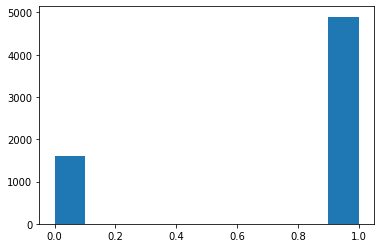

In [ ]:
# 히스토그램
plt.hist('class', data=df)
plt.show()

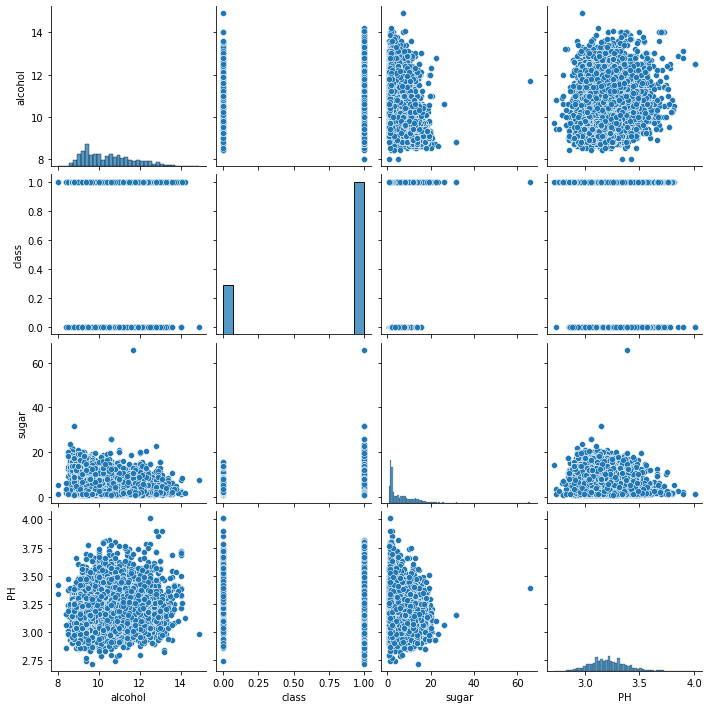

In [ ]:
# 산점도
sns.pairplot(df)
plt.show()

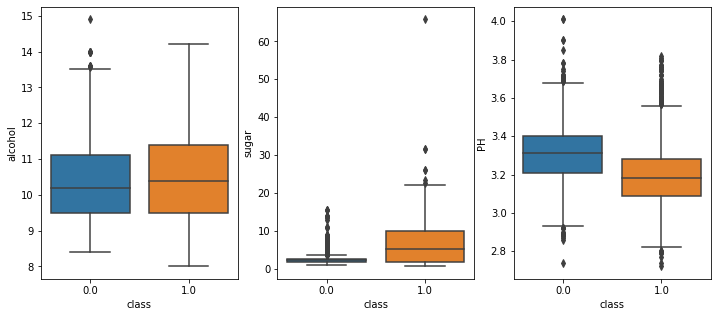

In [ ]:
# 박스플랏
_, ax = plt.subplots(1, 3, figsize=(12,5))
sns.boxplot(x='class', y='alcohol', data=df, ax=ax[0])
sns.boxplot(x='class', y='sugar', data=df, ax=ax[1])
sns.boxplot(x='class', y='PH', data=df, ax=ax[2])
plt.show()

In [ ]:
df.corr()

,alcohol,class,sugar,PH
alcohol,1.000000,0.032970,-0.359415,0.121248
class,0.032970,1.000000,0.348821,-0.329129
sugar,-0.359415,0.348821,1.000000,-0.267320
PH,0.121248,-0.329129,-0.267320,1.000000


## 데이터 분할

In [25]:
X = df[['alcohol', 'sugar', 'PH']]
y = df[['class']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=7
)

In [27]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

## 모델 학습 - 로지스틱 회귀
- y class값의 고유값이 0과 1 두개임으로 단항 로지스틱 회귀가 사용됨.
- 로지스틱 회귀 분석에서 결과값이 0,1의 두가지는 시그모이드 함수가 실행되며
결과값이 0,1,2,3등 3개이상의 다항분류에서는 소프트맥스함수가 실행됨(추후 인공신경망에서 자세하게 학습)
- 로지스틱회귀분석의 옵션값 조정해봄
    - 반복분류를 실행함으로 max_iter매개변수에서 반복횟수를 지정할수 있음. 기본은 100임.
    - 로지스틱은 기본적으로 제공하는 리지(L2)규제를 사용함. 릿지에서는 alpha 매개변수로 규제의 양을 조정할수 있음. 
    - alpha가 커지면 규제가 커짐. 로지스틱회귀에서는 규제를 제어하는 변수가 C이며 C값이 작을수록 규제가 커짐.
    - C의 기본값은 1임.


In [28]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(train_scaled, y_train)
print(model_lr.score(train_scaled, y_train), model_lr.score(test_scaled, y_test))

0.7835935781834177 0.7723076923076924


In [29]:
print(model_lr.coef_, model_lr.intercept_)

[[ 0.51016707  1.66452147 -0.68809087]] [1.79624665]


## 학습 평가

- pvalue 값에 대하여 이해하세요

- 참고: 먼저 읽어보세요. https://3months.tistory.com/27

- 참고: https://rfriend.tistory.com/513 선형회귀 분석 자료도 있음.

- 참고: 회귀분석 https://mindscale.kr/course/basic-stat-r/collinearity/

- from statsmodels.formula.api import ols
- 참고: 회귀분석 http://doc.mindscale.kr/km/python/09.html

In [30]:
########################################
### 관측치 값들의 관여 민감도
### P>\z\ 값의 크기를 확인하여서 x1,x2,x3(넘파이로 변환해서 이렇게 나옴. 판다스형태에서 작업하면 변수명 출력됨)
###  x1(alcohol), x2(sugar), x3(PH) 값이 모두 특징값으로 참여해도 됨을 확인하는 작업임.
## import statsmodels.api as sm 를 이용하여서 
#######################################

# (p- 값 <0.05, 5 % 유의 수준). 계수는 양수이며 로그 승산 조건임

import statsmodels.api as sm

logitreg = sm.Logit(y_train, train_scaled)
logitreg_fit = logitreg.fit()

results=logitreg_fit.summary()
results

Optimization terminated successfully.
         Current function value: 0.608011
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                -0.08961
Time:                        07:19:53   Log-Likelihood:                -2764.6
converged:                       True   LL-Null:                       -2537.3
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3695      0.035     10.495      0.000       0.301       0.439
x2             0.7193      0.039     18.643      0.000       0.644       0.795
x3            -0.5039      0.035    -14.247      0.000      -0.573      -0.435
==============================================================================
"""

- results.params 해석 참고
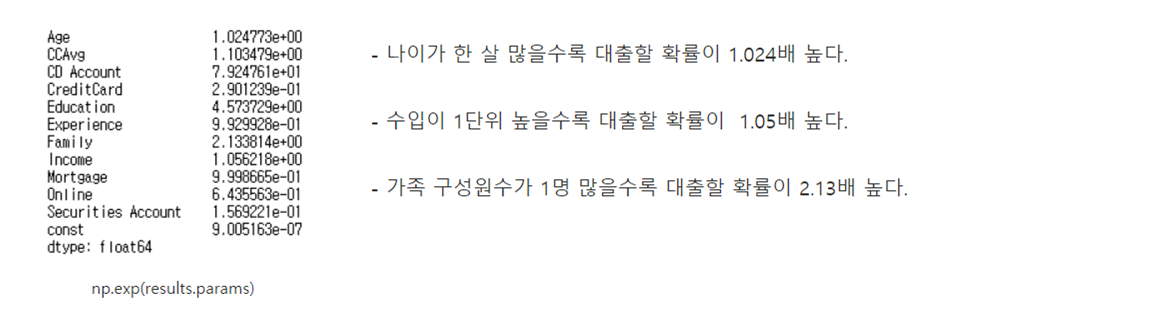

In [31]:
# 해석: alcohol값이 1 증가할때마다 class가 1이 될 확률이 1.447배 증가함.
import numpy as np
np.exp(logitreg_fit.params) 

x1    1.447024
x2    2.052941
x3    0.604151
dtype: float64

- 분류리포트와 혼돈행렬출력
    - 참고: [평가지표 및 ROC 커브곡선에 대한 기본 설명](https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html)
    - 참고: [재현율을 높일수 있게 임계구역(threshold)값을 조정](https://injo.tistory.com/13)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lr.predict(test_scaled)

In [ ]:
# 분류분석 보고서
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.56      0.33      0.42       480
         1.0       0.81      0.92      0.86      1470

    accuracy                           0.77      1950
   macro avg       0.69      0.62      0.64      1950
weighted avg       0.75      0.77      0.75      1950



In [ ]:
# 혼동행렬 출력
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 158,  322],
       [ 122, 1348]])

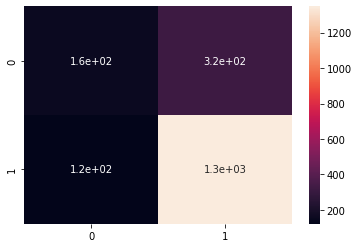

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

## 임계값
- 참고: [평가지표 및 ROC 커브곡선에 대한 기본 설명](https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html)
- 참고: [재현율을 높일수 있게 임계구역(threshold)값을 조정](https://injo.tistory.com/13)

In [ ]:
# 0 또는 1 예측값임.
pred_y = lr.predict(X_test)
pred_y

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# 임계값을 이용하여 사용자가 y예측값을 조정할수 있음.(사용자가 임계값을 지정하여서 1이 될수 있는 값의 영역을 설정할 수 있음)

def cut_off(y, threshold) :
    newY = y.copy()  
    newY[newY>threshold] = 1
    newY[newY<threshold] = 0
    return newY.astype(int)
    
result_pred_y = cut_off(lr.predict_proba(X_test)[:,1], 0.5)   # 0.5, 0.4등 값 조정 가능함.
result_pred_y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
########################################
### 오전에 제공한 김한용님 자료를 참고하여 또는 직접 수정하여서 분류리포트의 재현율및 정밀도등
### 필요한 값의 성능을 올려 봅니다.
#######################################

## 다양한 모델

- 리지모델

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {'alpha':np.logspace(-4,1,6)}
model_ridge = GridSearchCV(Ridge(), param_grid=params).fit(train_scaled, y_train)
print(model_ridge.score(train_scaled, y_train), model_ridge.score(test_scaled, y_test))

0.21210600257072743 0.2144363737418904


- 라쏘모델

In [ ]:
from sklearn.linear_model import Lasso
params = {'alpha':np.logspace(-4,1,6)}
model_la = GridSearchCV(Lasso(), param_grid=params).fit(train_scaled, y_train)
print(model_la.score(train_scaled, y_train), model_la.score(test_scaled, y_test))

0.21210708807336687 0.21443395127564555


- SVM

In [32]:
from sklearn.svm import SVC

# Create a classifier: a support vector classifier
clf = SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(train_scaled, y_train)

print(clf.score(train_scaled, y_train), clf.score(test_scaled, y_test))

0.7539036727512646 0.7538461538461538


- 랜덤포레스트 모델

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
start = time.time() # 시작 시간

# 랜덤 포레스트의 parameter 범위 정의
RF_params = {
    'n_estimators' : [50, 100, 150, 200, 300, 500, 1000],
    'max_features' : ['auot', 'sqrt'],
    'max_depth' : [1, 2, 3, 5, 6, 10],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 3, 5, 10]
}

model_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=RF_params, n_jobs=-1).fit(train_scaled, y_train)

print(f'{np.round(time.time()-start, 3)}초') # 걸린시간
print(model_RF.score(train_scaled, y_train), model_RF.score(test_scaled, y_test))

1887.198초
0.9331427314712998 0.8553846153846154


- XGboost 모델

In [ ]:
from xgboost import XGBClassifier
start = time.time()

XGB_params = {
    'min_child_weight': [1,3, 5,10],
    'gamma': [0.3,0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5,7,10]}

model_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid=XGB_params, n_jobs=-1).fit(train_scaled, y_train)
print(f'{np.round(time.time()-start, 3)}초') # 걸린시간
print(model_xgb.score(train_scaled, y_train), model_xgb.score(test_scaled, y_test))

806.883초
0.9430393666153508 0.8502564102564103


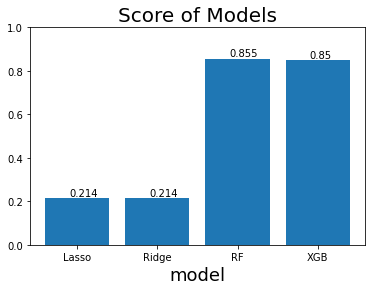

In [ ]:
x_lab = ['Lasso', 'Ridge', 'RF', 'XGB']
scores = [model_la.score(test_scaled, y_test), model_ridge.score(test_scaled, y_test), model_RF.score(test_scaled, y_test), model_xgb.score(test_scaled, y_test)]
plt.bar(x_lab, scores)
plt.title('Score of Models', fontsize=20)
plt.xlabel('model', fontsize=18)
plt.ylabel('', fontsize=18)
plt.ylim(0, 1)

for i,v in enumerate(scores):
    plt.text(i-0.1, v+0.01, str(np.round(v,3))) # x 좌표, y 좌표, 텍스트

plt.show()

- 일반적으로 좋은 결과와 시간도 짧은 모델을 선택해서 사용
- 꼭 써야하는 모델이라면 모델의 옵션값을 조정해서 작업하거나 k-fold로 데이터값을 더 증강해서 사용하거나 변수의 스케일링을 다르게 하거나 값의 분포도를 확인해서 이상치값을 제거하는 등의 방법을 사용

## decision tree (의사 결정 트리 )
- 의사결정나무의 원리와 모듈이 아닌 직접 코드로 구현하고자 한다면: https://zephyrus1111.tistory.com/124

- 옵션값: https://wikidocs.net/43909, https://inuplace.tistory.com/548

- 가지치기에 대한 설명: https://todayisbetterthanyesterday.tistory.com/38
- 타이타닉 데이터를 의사결정 나무로: https://pinkwink.kr/1141

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_target = y_train
test_target = y_test

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9975808225203431
0.8097435897435897


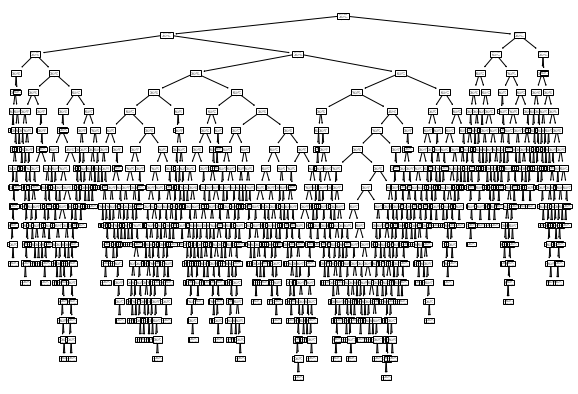

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

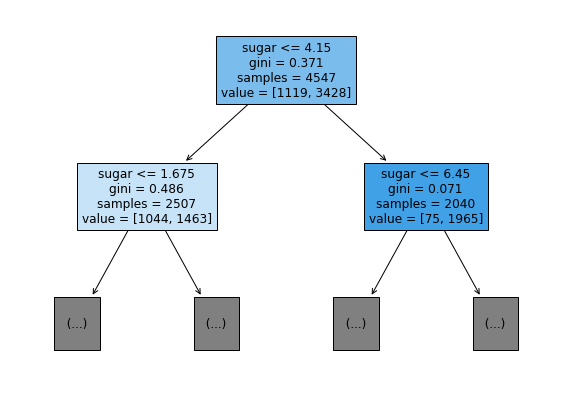

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
plt.show()

In [ ]:
# 가지치기
dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8482515944578843
0.8292307692307692


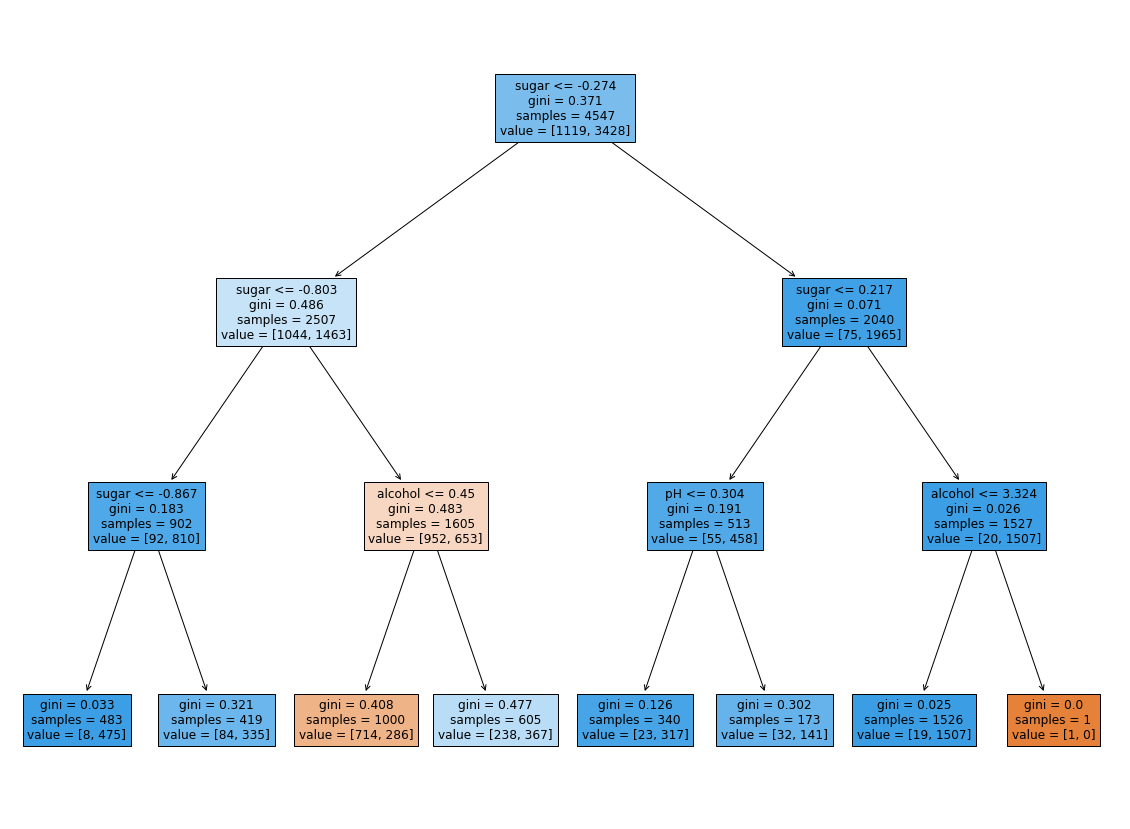

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) 
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8482515944578843
0.8435897435897436


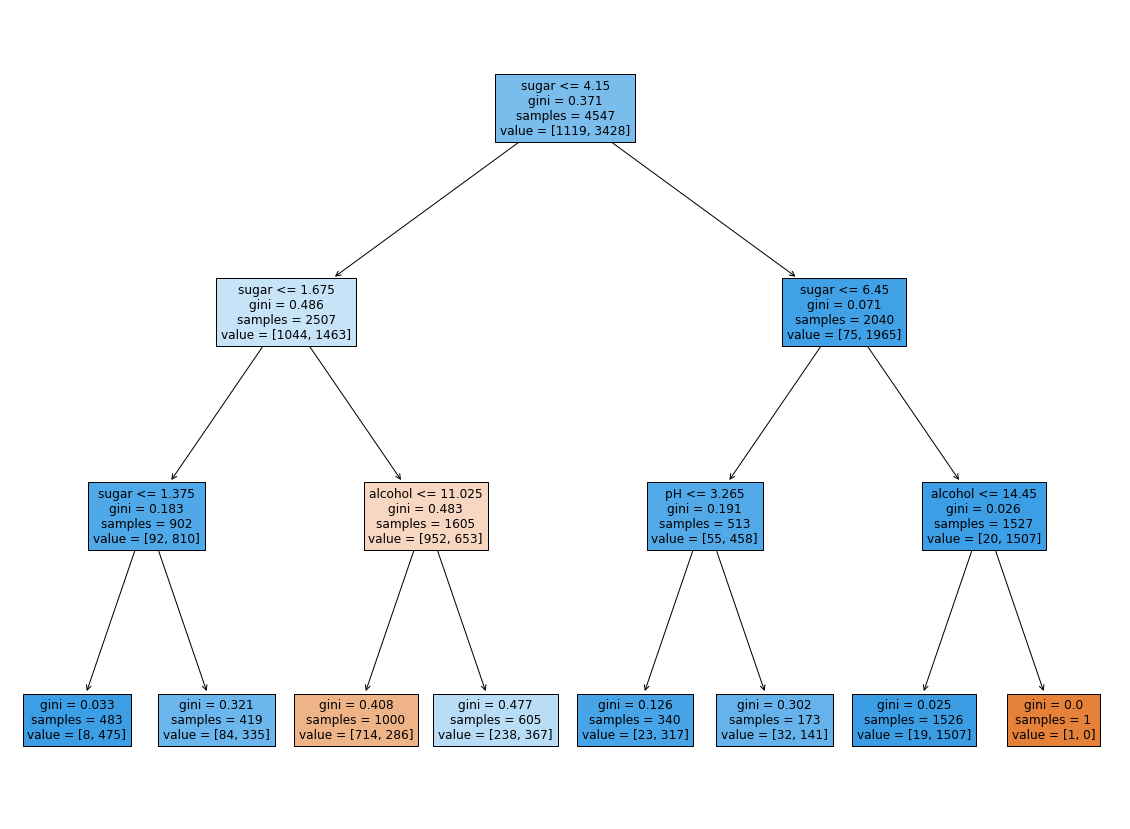

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.11229542 0.88324272 0.00446186]


In [ ]:
# 확인
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42) # min_impurity_decrease : 최소 불순도
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.893776116120519
0.8533333333333334


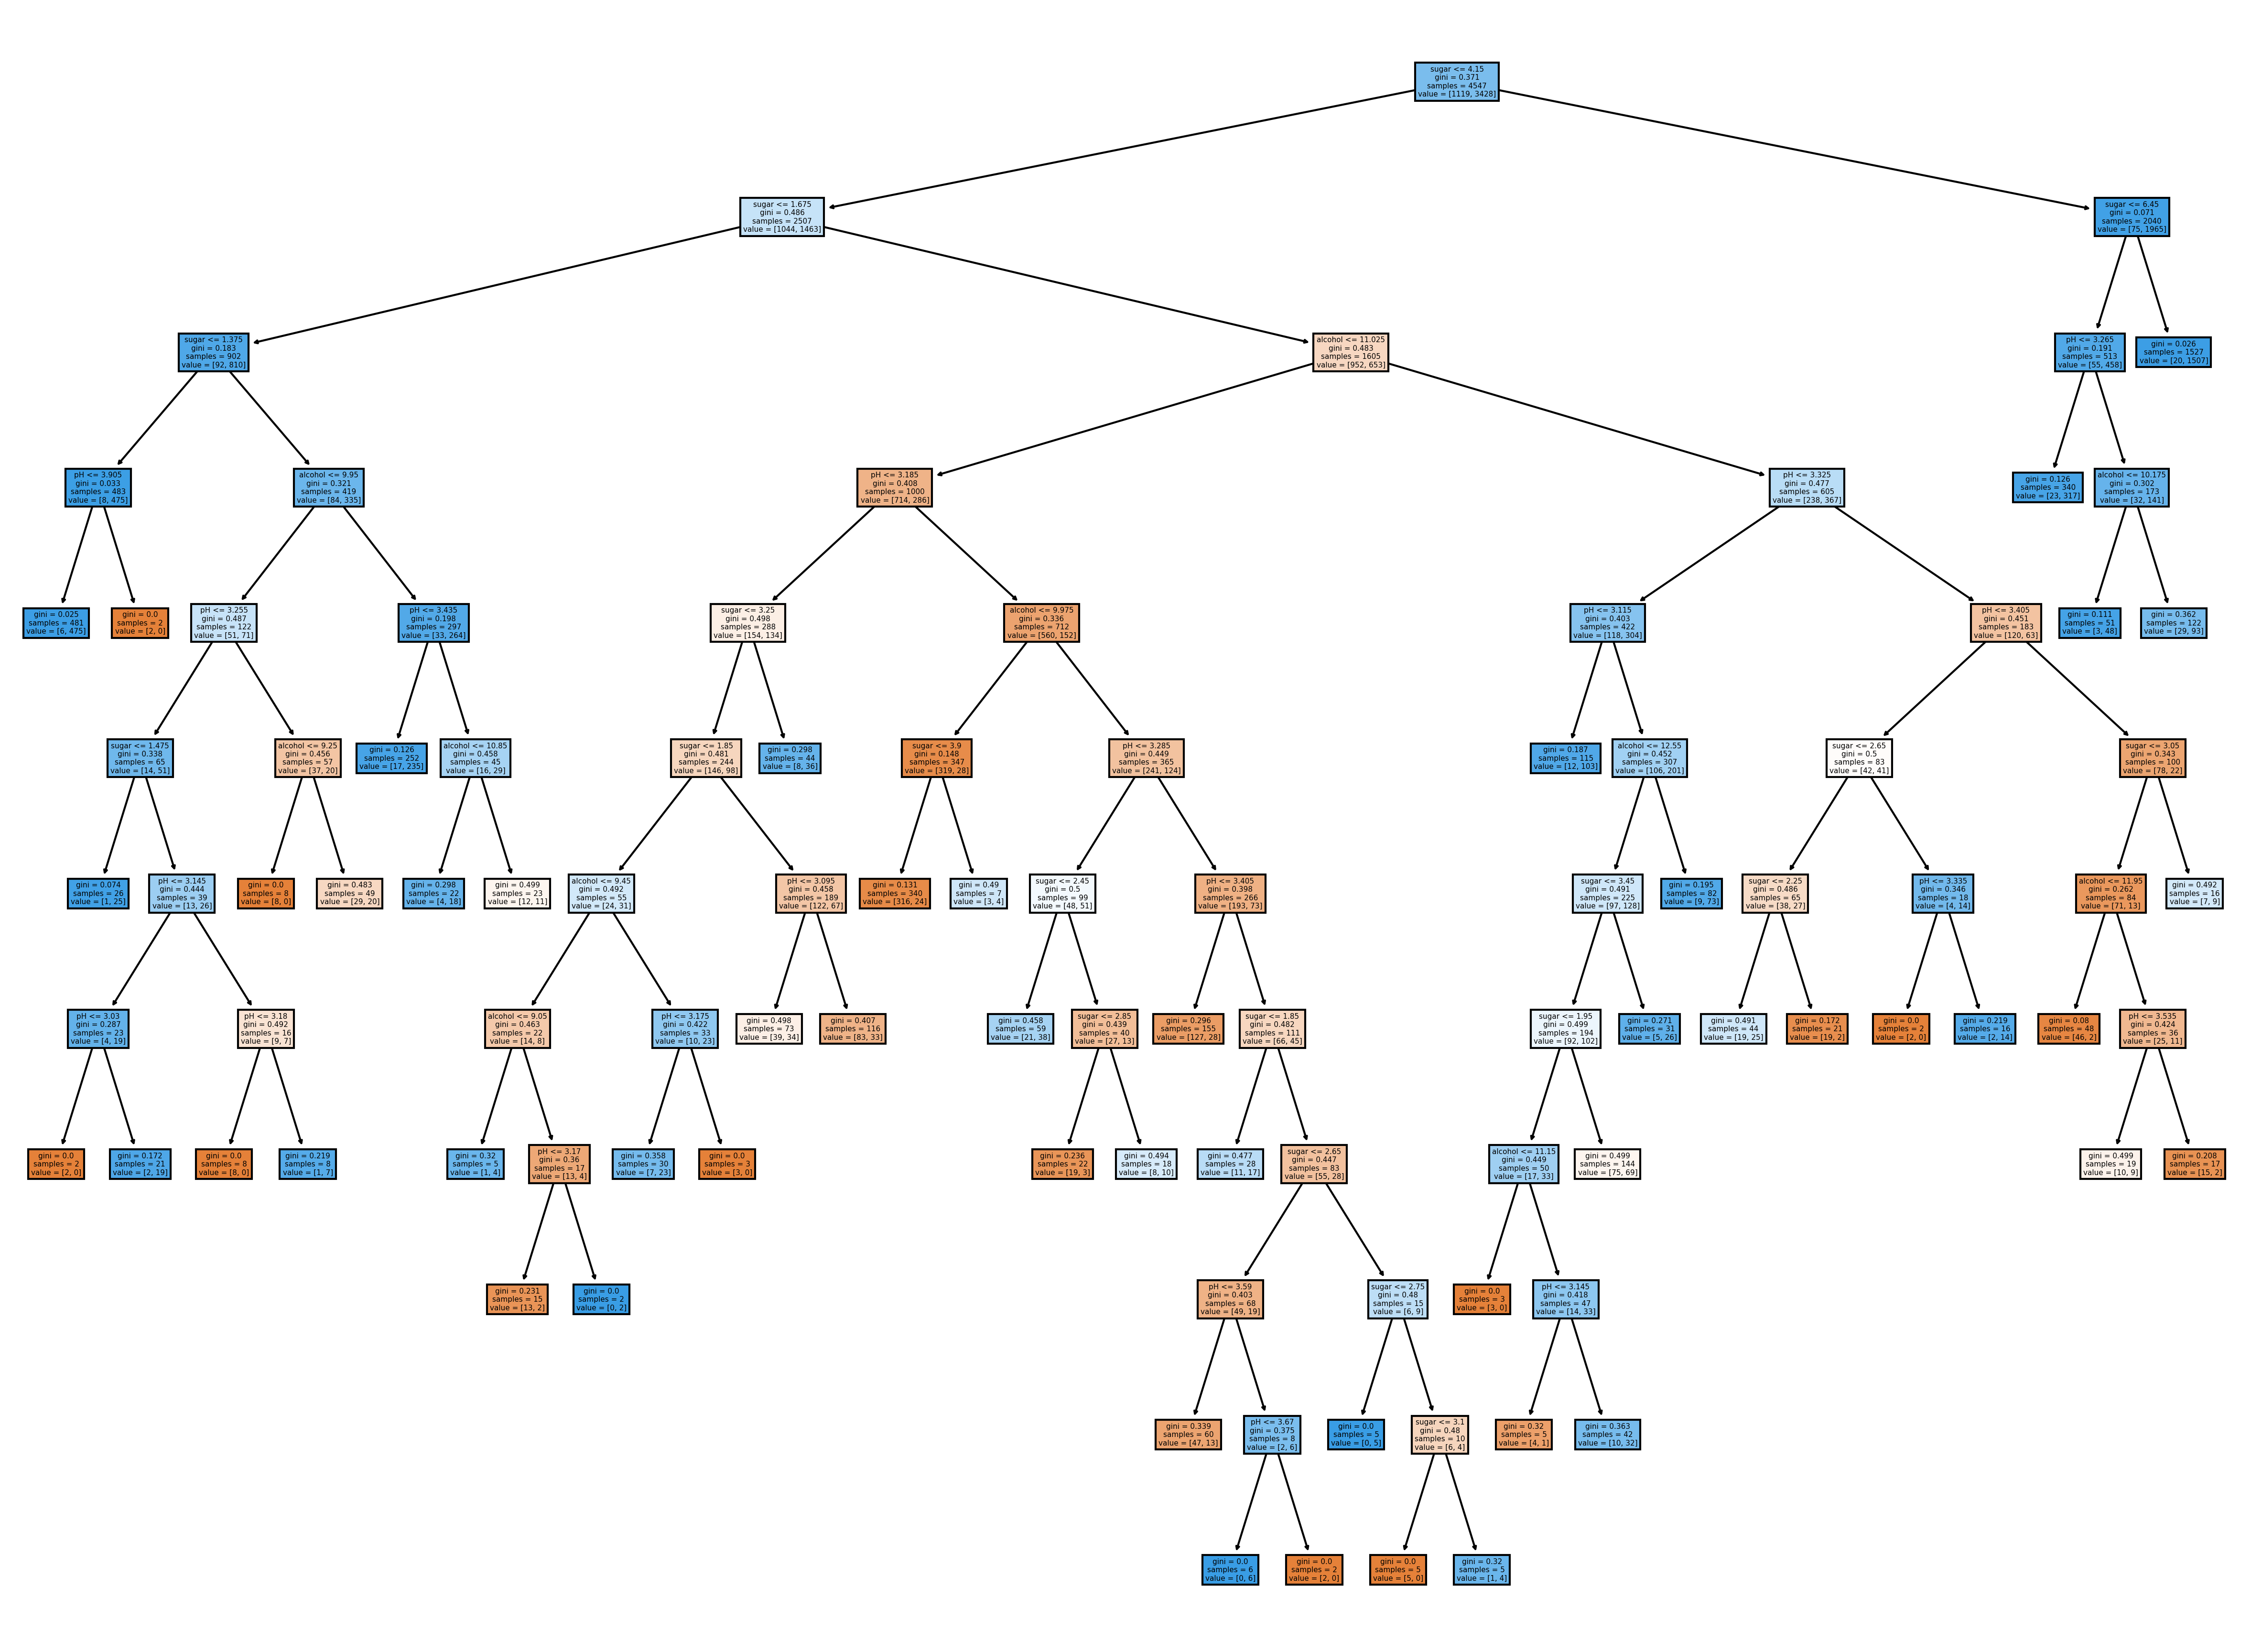

In [ ]:
plt.figure(figsize=(20,15), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()